# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For my Data Analysis Project I am using TMDB Movie data set which contains 4803 entries and consist of two files; one for the movie information and other for cast and crew information.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [70]:
df_movie=pd.read_csv('tmdb_5000_movies.csv')
df_cast=pd.read_csv('tmdb_5000_credits.csv')

In [71]:
df_cast.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [72]:
df_movie.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [73]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [74]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

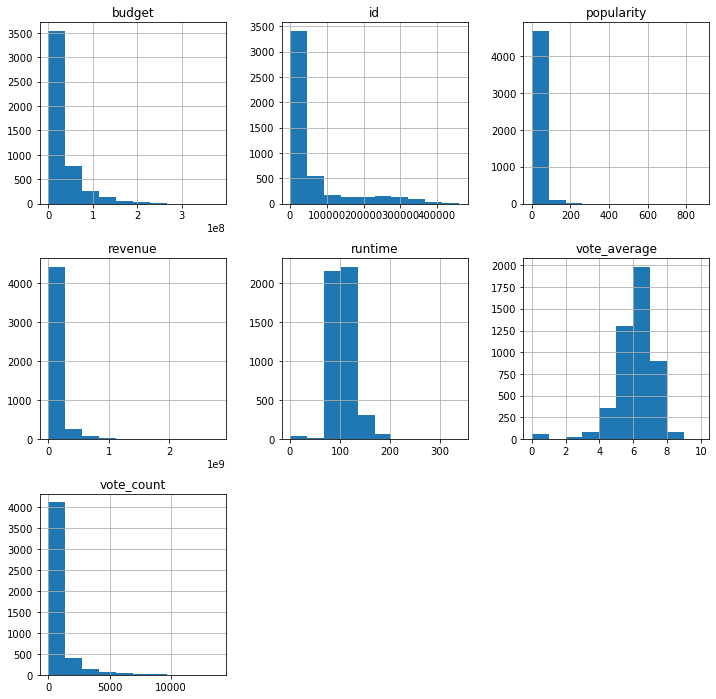

In [75]:
df_movie.hist(figsize=(12,12));

## General Properties

- This dataset contains a total of 4803 movie enteries, with their data split up into two files. One of the data file contains information about the movie's budget, genres, language, runtime etc, divided in 20 columns. The other data file holds cast and crew data of the movies spread into 4 columns.

## Observations And Work-arounds

- Unit of currency is not mentioned in the dataset. So, for the purpose of analysis, I have assumed it to be dollar.
- By looking at the data, it is observble that the columns; like cast and genres, are no longer seprated by '|'. It is a dictionary now, so we don't have to worry about cleaning them.
- The vote count for each movie is different so consequenlty, the "vote_average" column is affected by it; therefore, it cannot be assumed that the movie with highest votes is more popular.
- I am going to consider those movies only which have been released.
- For ease of analysis, I am going to join both dataframes into one.
- There are some columns, such as the ones mentioned below, that are not required to be taken into consideration. 
  From Movies table
   - Homepage 
   - Overview
   - Original Title
   - Spoken languages
   - Keywords
   - Tagline
- From credit dataframe, only movie ID will be used to join the dataframe and cast column.
   

## Questions
   
   - Which Movie earns maximum and minimum profit.
   - Which Year had the maximum Profit.
   - Which month is most successful
   - Most successful genres
   - Which Actors have appeared in most popular movies.      
   - Average runtime of successful movies.

## Data Cleaning 

### 1) removing columns that we don't require

In [76]:
df_movie.drop(['homepage','keywords','overview','spoken_languages','original_title','tagline'],axis=1,inplace=True)

In [77]:
df_cast.drop(['title','crew'],axis=1,inplace=True)

In [78]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   cast      4803 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.2+ KB


In [79]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   original_language     4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 525.5+ KB


Now we are going to Merge both of the dataframes based on movies id.

In [80]:
df=df_movie.merge(df_cast,left_on='id',right_on='movie_id',how='inner')

In [81]:
df.drop('movie_id',axis=1,inplace=True)

In [82]:
df.head(1)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."


### 2) Check for duplicate data

In [83]:
df.duplicated().sum()

0

### 3) Droping rows which have '0' revenue or budget

In [84]:
df.query('revenue==0 | budget==0').count()

budget                  1574
genres                  1574
id                      1574
original_language       1574
popularity              1574
production_companies    1574
production_countries    1574
release_date            1573
revenue                 1574
runtime                 1572
status                  1574
title                   1574
vote_average            1574
vote_count              1574
cast                    1574
dtype: int64

In [85]:
check_row = ['budget', 'revenue']
df[check_row] = df[check_row].replace(0, np.NaN)
df.dropna(subset = check_row, inplace = True)
df.shape

(3229, 15)

Now we have 3229 rows in out data.

### 4) Changing release date to datetime format

In [86]:
df.release_date = pd.to_datetime(df['release_date'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   float64       
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   original_language     3229 non-null   object        
 4   popularity            3229 non-null   float64       
 5   production_companies  3229 non-null   object        
 6   production_countries  3229 non-null   object        
 7   release_date          3229 non-null   datetime64[ns]
 8   revenue               3229 non-null   float64       
 9   runtime               3229 non-null   float64       
 10  status                3229 non-null   object        
 11  title                 3229 non-null   object        
 12  vote_average          3229 non-null   float64       
 13  vote_count        

### We are now ready to perform analysis on our data

<a id='eda'></a>
## Exploratory Data Analysis


### 1) Which Movie earns maximum and minimum profit.

Adding new column of profit

In [88]:
df.insert(1, 'Profit', df['revenue'] - df['budget'])
df.head(2)

,budget,Profit,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast
0,237000000.0,2.550965e+09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000.0,6.610000e+08,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."


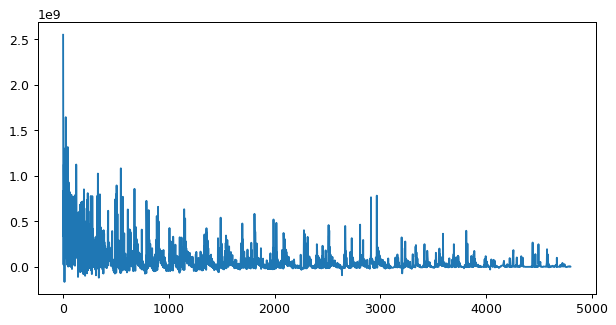

In [89]:
plt.figure(figsize=(8,4), dpi = 90);
plt.plot(df['Profit']);

In [90]:
max_revenue=df['Profit'].idxmax()
min_revenue=df['Profit'].idxmin()
highest_profit_movie=pd.DataFrame(df.iloc[max_revenue])
lowest_profit_movie=pd.DataFrame(df.iloc[min_revenue])
profit_df=pd.concat([highest_profit_movie, lowest_profit_movie], axis = 1)
profit_df.rename(columns={0 : 'Highest Profit', 13 : 'Lowest Profit'},inplace=True)
profit_df

,Highest Profit,Lowest Profit
budget,2.37e+08,2.55e+08
Profit,2.55097e+09,-1.6571e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
id,19995,57201
original_language,en,en
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2.78797e+09,8.92899e+07


In [91]:
print("Movie With highest Revenue :{}".format(profit_df['Highest Profit']['title']))
print("Movie With highest Revenue :{}".format(profit_df['Lowest Profit']['title']))

Movie With highest Revenue :Avatar
Movie With highest Revenue :The Lone Ranger


### 2) Which Year had the maximum Profit.

Add new column of years in our data frame

In [92]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df.head(1)

,budget,Profit,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,year
0,237000000.0,2.550965e+09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2009


Group by year and find the maximim profit in each year

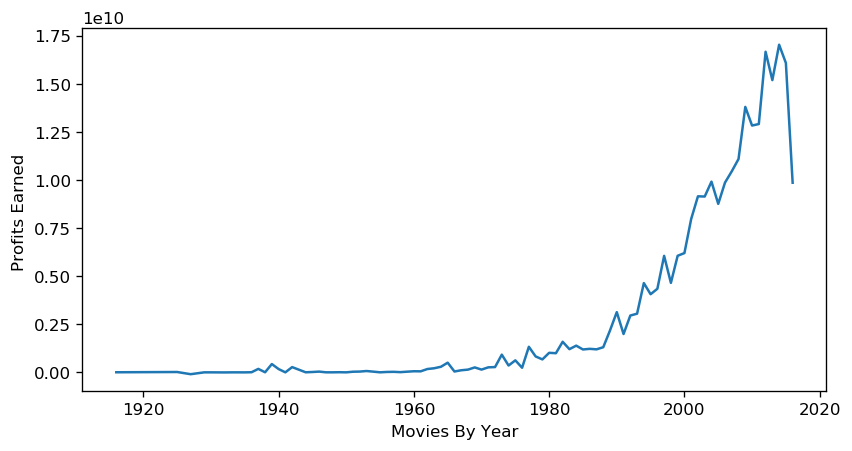

In [93]:
profits_year = df.groupby('year')['Profit'].sum()
plt.figure(figsize=(8,4), dpi = 120)
plt.xlabel('Movies By Year')
plt.ylabel('Profits Earned ')
plt.plot(profits_year)
plt.show()

In [94]:
profits_year.idxmax()

2014

#### Dividing our dataframe into two different dataframes for furthur analysis on the basis of profit

In [95]:
mean=df.Profit.mean()
low = df.query('Profit < {}'.format(mean))
high = df.query('Profit >= {}'.format(mean))

mean_profit_low = low['Profit'].mean()
mean_profit_high = high['Profit'].mean()

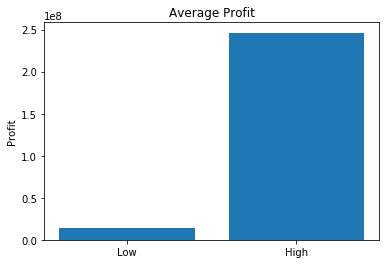

In [96]:
locations = [1, 2]
heights = [mean_profit_low, mean_profit_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Profit')
plt.ylabel('Profit');

### 3) Which month is most successful

In [97]:
df['month'] = pd.DatetimeIndex(df['release_date']).month
df.head(1)

,budget,Profit,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,year,month
0,237000000.0,2.550965e+09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2009,12


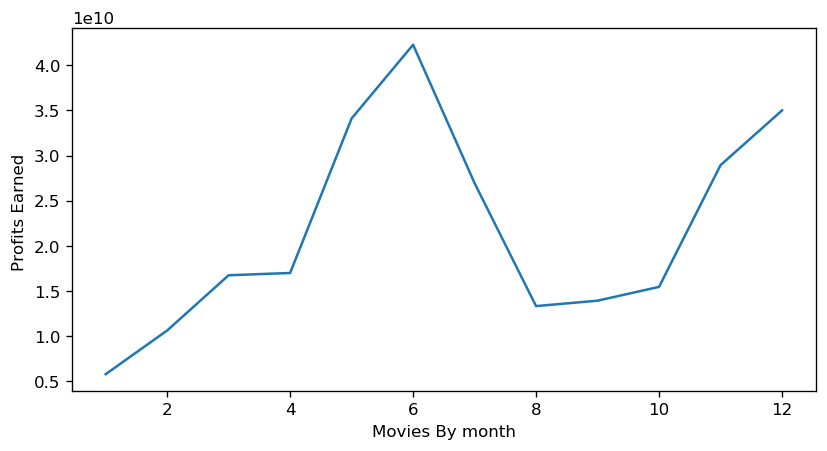

In [98]:
profits_year = df.groupby('month')['Profit'].sum()
plt.figure(figsize=(8,4), dpi = 120)
plt.xlabel('Movies By month')
plt.ylabel('Profits Earned ')
plt.plot(profits_year)
plt.show()

### 4) Most successful genres

Converting list of dictionaries to list for only genre type

In [111]:
import ast
gen=df['genres']
a=gen.tolist()
x = [ast.literal_eval(i) for i in a]
genre=[]
l=[]
for i in x:    
    for j in i:
        l.append(j.get('name'))
    genre.append(l)     
count_genre=pd.Series(l)
count_genre=count_genre.value_counts()

### Chart for all genre

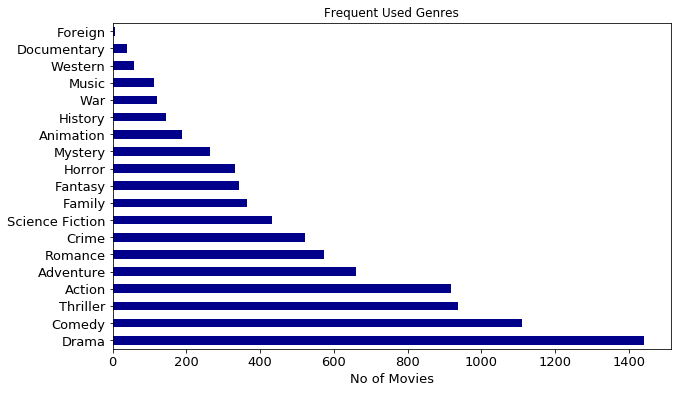

In [112]:
lt = count_genre.plot.barh(fontsize = 13,color='darkblue')
lt.set(title = 'Frequent Used Genres')
lt.set_xlabel('No of Movies', fontsize = '13')
lt.figure.set_size_inches(10, 6)
plt.show()

### Profitable Genre

In [101]:
import ast
gen=high['genres']
a=gen.tolist()
x = [ast.literal_eval(i) for i in a]
genre=[]
l=[]
for i in x:    
    for j in i:
        l.append(j.get('name'))
    genre.append(l)     
count_genre=pd.Series(l)
count_genre=count_genre.value_counts()

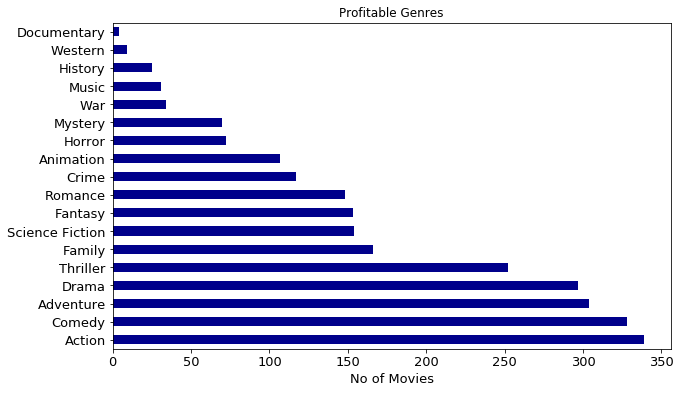

In [102]:
lt = count_genre.plot.barh(fontsize = 13,color='darkblue')
lt.set(title = 'Profitable Genres')
lt.set_xlabel('No of Movies', fontsize = '13')
lt.figure.set_size_inches(10, 6)
plt.show()

### Unsuccessful Genre

In [103]:
import ast
gen=low['genres']
a=gen.tolist()
x = [ast.literal_eval(i) for i in a]
genre=[]
l=[]
for i in x:    
    for j in i:
        l.append(j.get('name'))
    genre.append(l)     
count_genre=pd.Series(l)
count_genre=count_genre.value_counts()

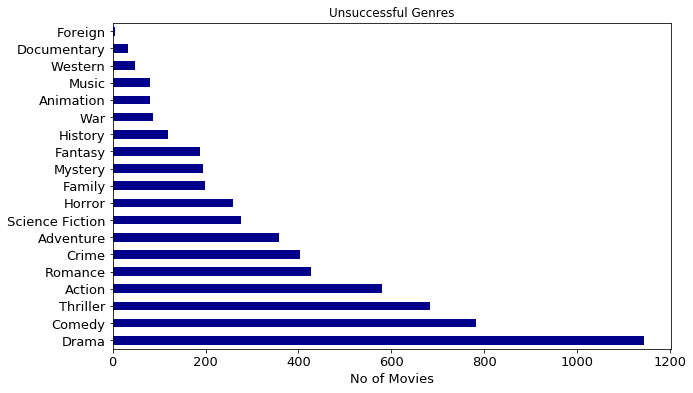

In [104]:
lt = count_genre.plot.barh(fontsize = 13,color='darkblue')
lt.set(title = 'Unsuccessful Genres')
lt.set_xlabel('No of Movies', fontsize = '13')
lt.figure.set_size_inches(10, 6)
plt.show()

### 5) Which Actors have appeared in most popular movies.

In [105]:
import ast
gen=high['cast']
a=gen.tolist()
x = [ast.literal_eval(i) for i in a]
genre=[]
l=[]
for i in x:    
    for j in i:
        l.append(j.get('name'))
    genre.append(l)     
count_genre=pd.Series(l)
count_genre=count_genre.value_counts()

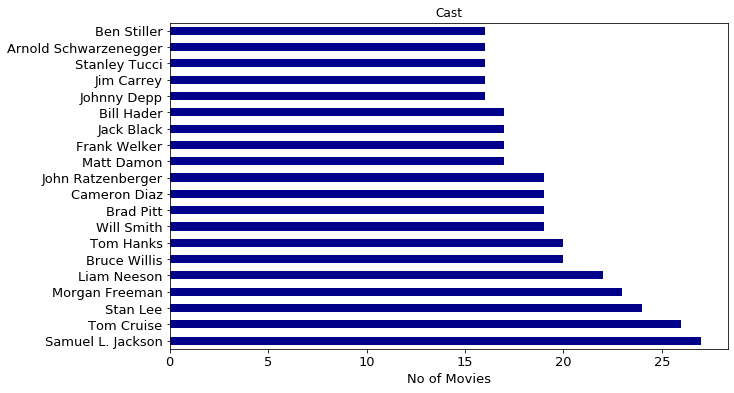

In [106]:
lt = count_genre.head(20).plot.barh(fontsize = 13,color='darkblue')
lt.set(title = 'Cast')
lt.set_xlabel('No of Movies', fontsize = '13')
lt.figure.set_size_inches(10, 6)
plt.show()

### Which genre have most successfull movies.

### 6) Average runtime of successful movies

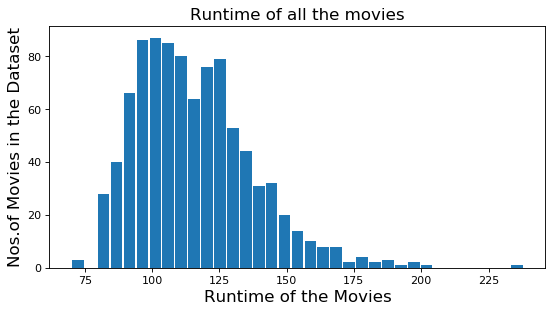

In [107]:
plt.figure(figsize=(8,4), dpi = 80)
plt.xlabel('Runtime of the Movies', fontsize = 15)
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(high['runtime'], rwidth = 0.9, bins =35)
plt.show()

In [108]:
high.runtime.mean()

115.61827956989248

In [109]:
high.original_language.value_counts()

en    917
ja      4
zh      3
cn      2
fr      2
es      1
da      1
Name: original_language, dtype: int64

<a id='conclusions'></a>
## Conclusions

Interesting facts were successfully concluded after analyzing the data:

#### for a movie to be successful:
   - Average runtime of movie should be between 100-120 minutes.
   - Cast should include famous actors like Sameul Jackson , Tom Cruise etc.
   - Action genre, combined with comedy, would be most successful.
   - The best month to release the movie would be june.
    
#### Limitation:
The result of the conducted analysis completely depends upon the chosen data set because no external source of information has been included to make the deductions. Moreover, the absence and partiality of data along with deliberately left out entries have impacted the findings. The conclusions made are true and local only to the dataset and thus can't be genralized to every situation; yet the findings can be useful.  
